In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re
import sys,csv

This code to find out the trending topic on Twitter. Purpose of use for market research. 
This satisfies the statistical data for markters, as they are the stakeholders of this project
referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
adjusted by changing variables names and accounts to compare statistical data of

In [2]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

# Trending Topic Analysis of Specified Twitter Accounts

The purpose of the selceted accounts is for the stakeholders (marketers) to comb through the accounts and analysis data of the tweets for use of targeting an audience of their choice, based on the results displayed through the tweetsentimentanalysis.csv. 

In [3]:
#Specified list of twitter accounts to search through of data collected
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [4]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
 
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter'] 

print("User name selection finished:",  requested_users_list)
#How many tweets for each user?
for n in requested_users_list:
    df_for_user = df_saved_file[df_saved_file["User"] == n]   
    print(n, "has", len(df_for_user), "tweets")
    
tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)

    
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df5 = df_top5tweets

#converts data frame into csv file data
df.to_csv('tweetsentimentanalysis.csv', index=False)

               User                                               text  \
0  @socialmedia2day  YouTube's looking to do its part to stop the s...   
1  @socialmedia2day  Health and medical info is getting more focus ...   
2  @socialmedia2day  Now you can prove your LinkedIn marketing know...   
3  @socialmedia2day  New translation options for IG Stories https:/...   
4  @socialmedia2day          Hashflags for all https://t.co/mNbvpl78Zu   

                             Date  
0  Fri Jul 23 00:30:05 +0000 2021  
1  Thu Jul 22 23:30:05 +0000 2021  
2  Thu Jul 22 22:45:02 +0000 2021  
3  Thu Jul 22 22:15:02 +0000 2021  
4  Thu Jul 22 21:45:02 +0000 2021  
               User                                               text  \
0  @socialmedia2day  YouTube's looking to do its part to stop the s...   
1  @socialmedia2day  Health and medical info is getting more focus ...   
2  @socialmedia2day  Now you can prove your LinkedIn marketing know...   
3  @socialmedia2day  New translation option

Converts data frame(df) into csv file of the list of set users ('@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter')
and lists 200 of the most recent tweets when the code is run.

In [5]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,More insight into how Google decides what to d...,Fri Jul 23 13:15:03 +0000 2021
1,@socialmedia2day,Text-based emoji search could be handy https:/...,Fri Jul 23 12:45:03 +0000 2021
2,@socialmedia2day,Would this make you more comfortable in audio ...,Fri Jul 23 12:15:03 +0000 2021
3,@socialmedia2day,Snapchat is solidifying its business https://t...,Fri Jul 23 11:45:02 +0000 2021
4,@socialmedia2day,Twitter's latest performance numbers are in ht...,Fri Jul 23 11:15:02 +0000 2021
...,...,...,...
816,@Twitter,@DBresach You got twttr jggl https://t.co/30vT...,Mon Jul 12 14:48:27 +0000 2021
817,@Twitter,"@parkjiminssssi yes bestie, on repeat",Fri Jul 09 16:28:47 +0000 2021
818,@Twitter,@ItsEvanTube exactly evan,Fri Jul 09 16:21:41 +0000 2021
819,@Twitter,@mcugoldblum this Tweet woke us up,Fri Jul 09 16:21:11 +0000 2021


In [6]:
import pandas as pd
df = pd.read_csv('tweetsentimentanalysis.csv')
print(df.head())

unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print("Available users", unique_users) # you can use it like a list of strings

               User                                               text  \
0  @socialmedia2day  More insight into how Google decides what to d...   
1  @socialmedia2day  Text-based emoji search could be handy https:/...   
2  @socialmedia2day  Would this make you more comfortable in audio ...   
3  @socialmedia2day  Snapchat is solidifying its business https://t...   
4  @socialmedia2day  Twitter's latest performance numbers are in ht...   

                             Date  
0  Fri Jul 23 13:15:03 +0000 2021  
1  Fri Jul 23 12:45:03 +0000 2021  
2  Fri Jul 23 12:15:03 +0000 2021  
3  Fri Jul 23 11:45:02 +0000 2021  
4  Fri Jul 23 11:15:02 +0000 2021  
Available users ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


# Twitter Sentiment Analysis - Polarity Score of Hashtags

### About the scroing: 

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05
NOTE: The compound score is the one most commonly used for sentiment analysis by most researchers, including the authors.

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want to analyze the context & presentation of how sentiment is conveyed or embedded in rhetoric for a given sentence. For example, different writing styles may embed strongly positive or negative sentiment within varying proportions of neutral text -- i.e., some writing styles may reflect a penchant for strongly flavored rhetoric, whereas other styles may use a great deal of neutral text while still conveying a similar overall (compound) sentiment. As another example: researchers analyzing information presentation in journalistic or editorical news might desire to establish whether the proportions of text (associated with a topic or named entity, for example) are balanced with similar amounts of positively and negatively framed text versus being "biased" towards one polarity or the other for the topic/entity.
IMPORTANTLY: these proportions represent the "raw categorization" of each lexical item (e.g., words, emoticons/emojis, or initialisms) into positve, negative, or neutral classes; they do not account for the VADER rule-based enhancements such as word-order sensitivity for sentiment-laden multi-word phrases, degree modifiers, word-shape amplifiers, punctuation amplifiers, negation polarity switches, or contrastive conjunction sensitivity.

!pip install VaderSentiment packaged needed to install to run sentiment analysis below 

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [9]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head(1000)

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,More insight into how Google decides what to d...,Fri Jul 23 13:15:03 +0000 2021,0.0000,0.000,0.0,1.000
1,@socialmedia2day,Text-based emoji search could be handy https:/...,Fri Jul 23 12:45:03 +0000 2021,0.0000,0.000,0.0,1.000
2,@socialmedia2day,Would this make you more comfortable in audio ...,Fri Jul 23 12:15:03 +0000 2021,0.5563,0.285,0.0,0.715
3,@socialmedia2day,Snapchat is solidifying its business https://t...,Fri Jul 23 11:45:02 +0000 2021,0.0000,0.000,0.0,1.000
4,@socialmedia2day,Twitter's latest performance numbers are in ht...,Fri Jul 23 11:15:02 +0000 2021,0.0000,0.000,0.0,1.000
...,...,...,...,...,...,...,...
816,@Twitter,@DBresach You got twttr jggl https://t.co/30vT...,Mon Jul 12 14:48:27 +0000 2021,0.0000,0.000,0.0,1.000
817,@Twitter,"@parkjiminssssi yes bestie, on repeat",Fri Jul 09 16:28:47 +0000 2021,0.4019,0.403,0.0,0.597
818,@Twitter,@ItsEvanTube exactly evan,Fri Jul 09 16:21:41 +0000 2021,0.0000,0.000,0.0,1.000
819,@Twitter,@mcugoldblum this Tweet woke us up,Fri Jul 09 16:21:11 +0000 2021,0.0000,0.000,0.0,1.000


Lists the most frequently used hashtags between the accounts 

In [10]:
import re
#collects the compound positive hashtags from the tweets data
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5]) 
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['startup',
 'SmallBusinessWeek',
 'SmallBusinessWeek',
 'ecommerce',
 'GML2021',
 'GoogleIO',
 'GML2021',
 'GoogleAdsTutorials',
 'GoogleIO',
 'WomensHistoryMonth',
 'GoogleForIndia',
 'WomenWill',
 'GoogleAdsTutorials',
 'WomensHistoryMonth',
 'GooglePartners',
 'BlackHistoryMonth',
 'Tokyo2020',
 'GossipGirl',
 'FridayFeeling',
 'NAIDOCWeek',
 'Pride',
 'ShareWithPride',
 'Pride',
 'NationalBestFriendsDay',
 'Pride',
 'Pride',
 'pride',
 'pridefamily',
 'genderfluid',
 'gayvisibility',
 'Pride',
 'Pride',
 'ShareWithPride',
 'TakeABreak',
 'MentalHealthAwarenessMonth',
 'WeeklyFluff',
 'this',
 'MothersDay',
 'MayThe4thBeWithYou',
 'TakeABreak',
 'APIHM',
 'NFLdraft',
 'Pride',
 'JuneTeenth2021',
 'WorldBloodDonorDay',
 'pride',
 'pride',
 'Pride',
 'APAHM',
 'EarthDay',
 'EarthDay']

In [11]:
import numpy as np
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.324348
@GoogleAds,0.319379
@Instagram,0.301540
@Twitter,0.119933
@socialmedia2day,0.127945


<AxesSubplot:xlabel='User'>

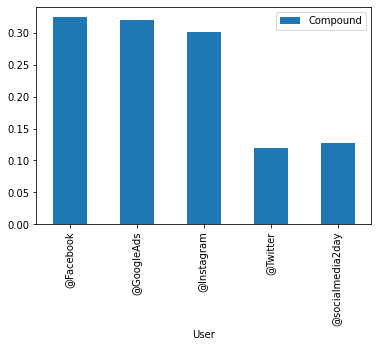

In [12]:
#plotting 
score_table.plot(kind='bar')

In [13]:
#Collect the positive values for each news source
score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

,Positive
User,
@Facebook,0.159055
@GoogleAds,0.131190
@Instagram,0.163890
@Twitter,0.126190
@socialmedia2day,0.108730


<AxesSubplot:xlabel='User'>

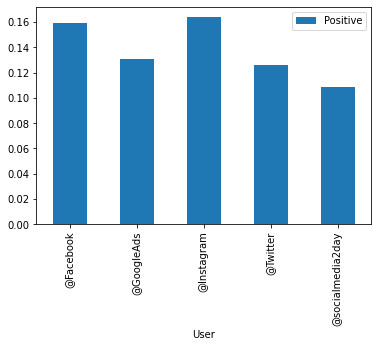

In [14]:
#Collect the positive values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [15]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

,Negative
User,
@Facebook,0.027735
@GoogleAds,0.011495
@Instagram,0.045340
@Twitter,0.014762
@socialmedia2day,0.022725


<AxesSubplot:xlabel='User'>

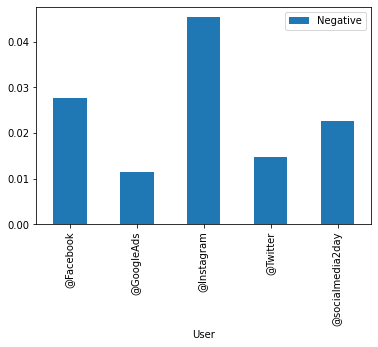

In [16]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [17]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@Facebook,0.027735
@GoogleAds,0.011495
@Instagram,0.045340
@Twitter,0.014762
@socialmedia2day,0.022725
